In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [61]:
df_1 = pd.read_csv("C:\\Users\\Toru\\Desktop\\My Project\\Salesdata.csv")
df_1

C:\Users\Toru\AppData\Local\Temp\ipykernel_7924\3048275493.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv("C:\\Users\\Toru\\Desktop\\My Project\\Salesdata.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,01-01-2013,0,0,0,0,a,1
1017205,1112,2,01-01-2013,0,0,0,0,a,1
1017206,1113,2,01-01-2013,0,0,0,0,a,1
1017207,1114,2,01-01-2013,0,0,0,0,a,1


In [62]:
df_2 =pd.read_csv("C:\\Users\\Toru\\Desktop\\My Project\\store.csv")
df_2

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [63]:
merge_df=df_1.merge(df_2, left_on="Store", right_on="Store")

In [64]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [65]:
merge_df.duplicated().sum()

0

In [66]:
merge_df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [67]:
# fill the missing value in CompetitionDistance with mode
CompetitionDistance_mode=merge_df["CompetitionDistance"].mode()[0]
merge_df["CompetitionDistance"].fillna(CompetitionDistance_mode,inplace=True)

In [68]:
# fill the missing value in CompetitionOpenSinceMonth with mode
CompetitionOpenSinceMonth_mode=merge_df["CompetitionOpenSinceMonth"].mode()[0]
merge_df["CompetitionOpenSinceMonth"].fillna(CompetitionOpenSinceMonth_mode,inplace=True)

In [69]:
# fill the missing value in CompetitionOpenSinceYear with mode
CompetitionOpenSinceYear_mode=merge_df["CompetitionOpenSinceYear"].mode()[0]
merge_df["CompetitionOpenSinceYear"].fillna(CompetitionOpenSinceYear_mode,inplace=True)

In [70]:
# fill the missing value in Promo2SinceWeek  with mode
Promo2SinceWeek_mode=merge_df["Promo2SinceWeek"].mode()[0]
merge_df["Promo2SinceWeek"].fillna(Promo2SinceWeek_mode,inplace=True)

In [71]:
# fill the missing value in Promo2SinceYear  with mode
Promo2SinceYear_mode=merge_df["Promo2SinceYear"].mode()[0]
merge_df["Promo2SinceYear"].fillna(Promo2SinceYear_mode,inplace=True)

In [72]:
# fill the missing value in PromoInterval with mode
PromoInterval_mode=merge_df["PromoInterval"].mode()[0]
merge_df["PromoInterval"].fillna(PromoInterval_mode,inplace=True)

In [73]:
# drop all the duplicates
merge_df.drop_duplicates(inplace=True)

In [74]:
merge_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,1,4,30-07-2015,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,1,3,29-07-2015,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,1,2,28-07-2015,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,1,1,27-07-2015,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,05-01-2013,4771,339,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,04-01-2013,4540,326,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,03-01-2013,4297,300,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,02-01-2013,3697,305,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [118]:
#To change Datatype to int
merge_df.loc[merge_df["Assortment"] == "a", "Assortment"]=0
merge_df.loc[merge_df["Assortment"] == "b", "Assortment"]=1
merge_df.loc[merge_df["Assortment"] == "c", "Assortment"]=2
merge_df["Assortment"]=merge_df["Assortment"].astype(int, copy=False)

In [119]:
merge_df.loc[merge_df["StateHoliday"] == "0", "StateHoliday"]=0
merge_df.loc[merge_df["StateHoliday"] == "a", "StateHoliday"]=1
merge_df.loc[merge_df["StateHoliday"] == "b", "StateHoliday"]=2
merge_df.loc[merge_df["StateHoliday"] == "c", "StateHoliday"]=3
merge_df["StateHoliday"]=merge_df["StateHoliday"].astype(int, copy=False)

In [120]:
merge_df.loc[merge_df["StoreType"] == "a", "StoreType"]=0
merge_df.loc[merge_df["StoreType"] == "b", "StoreType"]=1
merge_df.loc[merge_df["StoreType"] == "c", "StoreType"]=2
merge_df.loc[merge_df["StoreType"] == "d", "StoreType"]=3
merge_df["StoreType"]=merge_df["StoreType"].astype(int, copy=False)

In [121]:
print(merge_df[['Assortment','StateHoliday','StoreType']].nunique())

Assortment      3
StateHoliday    4
StoreType       4
dtype: int64


In [122]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int32  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int32  
 10  Assortment                 1017209 non-null  int32  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [124]:
merge_df["Sales"].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
19268         1
18344         1
17685         1
19544         1
21237         1
Name: Sales, Length: 21734, dtype: int64

In [143]:
#To change from data from object to datetime
merge_df['Date]'] = pd.to_datetime(merge_df['Date'], format='%d-%m-%Y')

In [156]:
# To change objects promomonthinterval to daetime
merge_df['CompetitionOpenSinceMonth']=pd.DatetimeIndex(merge_df['Date']).month

In [157]:
#To change float to integer
merge_df['CompetitionDistance']=merge_df['CompetitionDistance'].astype(int)
merge_df['Promo2SinceWeek']=merge_df['Promo2SinceWeek'].astype(int)

In [158]:
merge_df['CompetitionOpenSinceYear']=merge_df['CompetitionOpenSinceYear'].astype(int)
merge_df['Promo2SinceYear']=merge_df['Promo2SinceYear'].astype(int)

In [159]:
merge_df['CompetitionOpenSinceMont']=merge_df['CompetitionOpenSinceMonth'].astype(int)

In [150]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  object        
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int32         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int32         
 10  Assortment                 1017209 non-null  int32         
 11  CompetitionDistance        1017209 no

In [160]:
merge_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,PromoMonthInterval,Date],CompetitionOpenSinceMont
0,1,5,31-07-2015,5263,555,1,1,0,1,2,...,1270,7,2008,0,14,2011,"Jan,Apr,Jul,Oct",7,2015-07-31,7
1,1,4,30-07-2015,5020,546,1,1,0,1,2,...,1270,7,2008,0,14,2011,"Jan,Apr,Jul,Oct",7,2015-07-30,7
2,1,3,29-07-2015,4782,523,1,1,0,1,2,...,1270,7,2008,0,14,2011,"Jan,Apr,Jul,Oct",7,2015-07-29,7
3,1,2,28-07-2015,5011,560,1,1,0,1,2,...,1270,7,2008,0,14,2011,"Jan,Apr,Jul,Oct",7,2015-07-28,7
4,1,1,27-07-2015,6102,612,1,1,0,1,2,...,1270,7,2008,0,14,2011,"Jan,Apr,Jul,Oct",7,2015-07-27,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,05-01-2013,4771,339,1,0,0,1,3,...,5350,5,2013,1,22,2012,"Mar,Jun,Sept,Dec",5,2013-01-05,5
1017205,1115,5,04-01-2013,4540,326,1,0,0,1,3,...,5350,4,2013,1,22,2012,"Mar,Jun,Sept,Dec",4,2013-01-04,4
1017206,1115,4,03-01-2013,4297,300,1,0,0,1,3,...,5350,3,2013,1,22,2012,"Mar,Jun,Sept,Dec",3,2013-01-03,3
1017207,1115,3,02-01-2013,3697,305,1,0,0,1,3,...,5350,2,2013,1,22,2012,"Mar,Jun,Sept,Dec",2,2013-01-02,2


In [185]:
# Using Uni-varient analysis
a=merge_df["CompetitionOpenSinceMonth"].value_counts()

In [186]:
a

5     97040
3     97040
1     97039
6     93695
4     93695
7     93620
2     87005
12    72435
10    72435
8     72435
11    70385
9     70385
Name: CompetitionOpenSinceMonth, dtype: int64

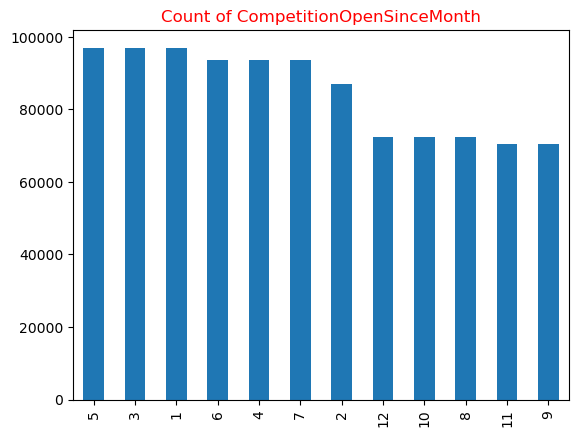

In [187]:
a.plot(kind="bar")
plt.title("Count of CompetitionOpenSinceMonth", color="red")
plt.show()

This shows the count of competition open since the month began, from the bar chart it shows the month of May,March and January(5,3,1) has the highest count 

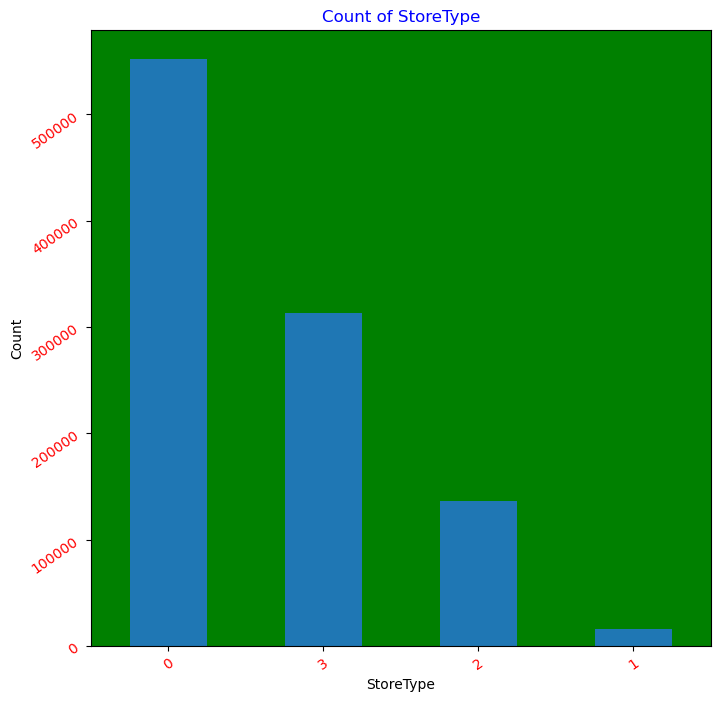

In [189]:
fig, ax=plt.subplots(figsize=(8,8), facecolor="white")
ax.set_facecolor("green")
merge_df["StoreType"].value_counts().plot(kind="bar")
plt.title("Count of StoreType", color="blue")
plt.ylabel("Count")
plt.xlabel("StoreType")
plt.xticks(rotation=35,color="red")
plt.yticks(rotation=35,color="red")
plt.show()

This shows the count of store type. From the bar chart it shows over 50,000 customers purchased from the zero store

In [198]:
merge_df.Promo

0          1
1          1
2          1
3          1
4          1
          ..
1017204    0
1017205    0
1017206    0
1017207    0
1017208    0
Name: Promo, Length: 1017209, dtype: int64

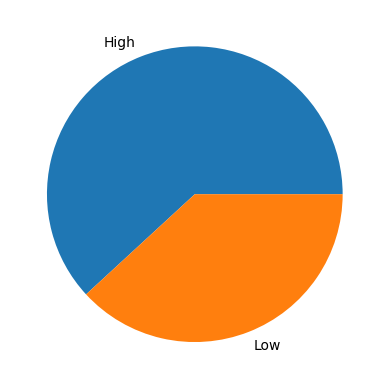

In [199]:
#Using Matplot
a=merge_df.Promo.value_counts()
a.index=["High","Low"]
plt.pie(x=a.values,labels=a.index)
plt.show()

This shows the count of promo with the blue pie chart indicating high truned up on promo while the orange pie chart indicate the low turned up on promo

In [87]:
merge_df.Sales

0          5263
1          5020
2          4782
3          5011
4          6102
           ... 
1017204    4771
1017205    4540
1017206    4297
1017207    3697
1017208       0
Name: Sales, Length: 1017209, dtype: int64

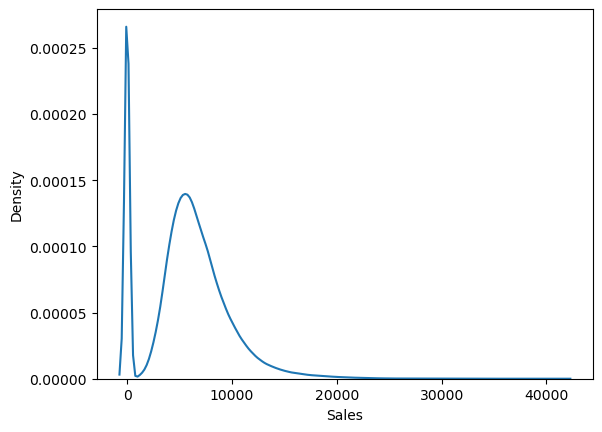

In [88]:
#using seaborn
sns.kdeplot(merge_df["Sales"])
plt.show()

It shows over 25% purchased from the sales.

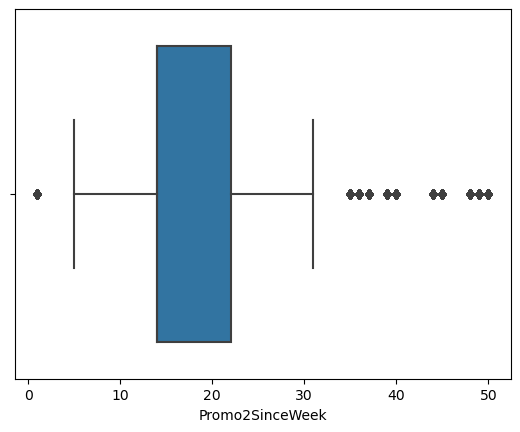

In [201]:
sns.boxplot(x=merge_df["Promo2SinceWeek"])
plt.show()

In [90]:
a=pd.crosstab(index=merge_df["Promo"], columns=merge_df["PromoInterval"], values=merge_df["PromoInterval"], aggfunc="count")

In [91]:
a

PromoInterval,"Feb,May,Aug,Nov","Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec"
Promo,,,
0,73350,495517,60262
1,45246,305636,37198


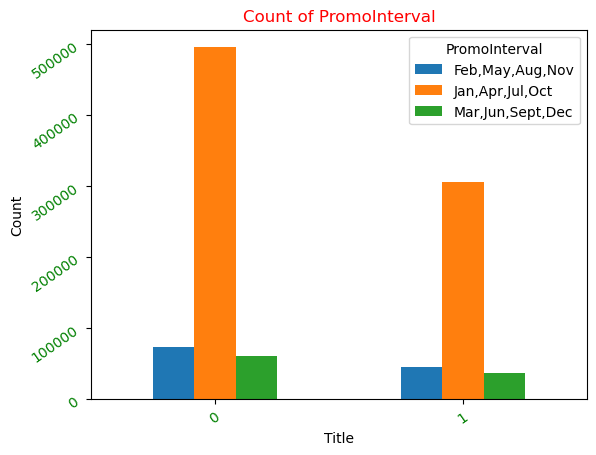

In [216]:
a=pd.crosstab(index=merge_df["Promo"], columns=merge_df["PromoInterval"], values=merge_df["PromoInterval"], aggfunc="count")
a.plot(kind="bar")
plt.title("Count of PromoInterval", color="red")
plt.ylabel("Count")
plt.xlabel("Title")
plt.xticks(rotation=35,color="green")
plt.yticks(rotation=35,color="green")

plt.show()

In [93]:
merge_df.Promo2

0          0
1          0
2          0
3          0
4          0
          ..
1017204    1
1017205    1
1017206    1
1017207    1
1017208    1
Name: Promo2, Length: 1017209, dtype: int64

In [94]:
a=pd.crosstab(index=merge_df["Promo2"], columns=merge_df["PromoMonthInterval"], values=merge_df["PromoMonthInterval"], aggfunc="count")

In [95]:
a

PromoMonthInterval,Apr,Jun,May
Promo2,,,
0,508031.0,NaN,NaN
1,293122.0,97460.0,118596.0


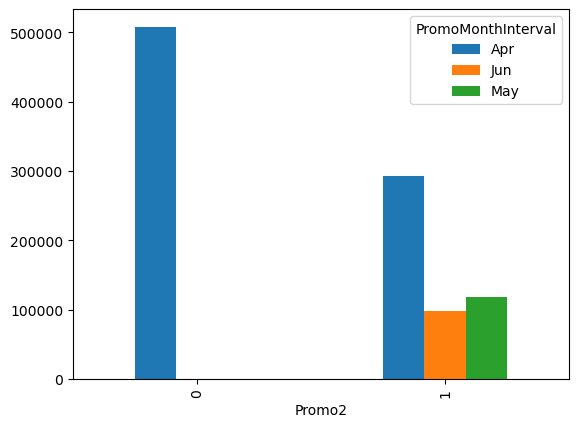

In [96]:
a.plot(kind="bar")
plt.show()

<AxesSubplot:xlabel='Promo'>

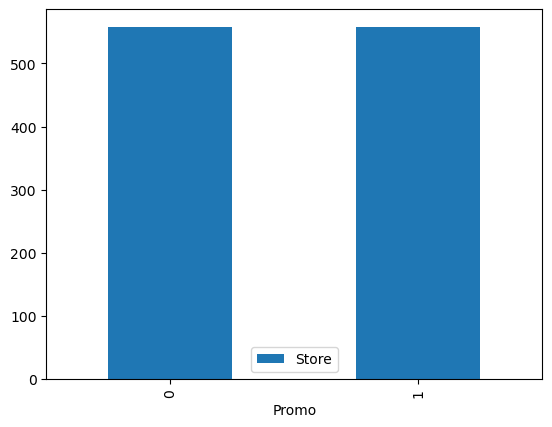

In [97]:
merge_df.groupby("Promo").agg({"Store":"mean"}).round().plot(kind="bar")

In [218]:
x=merge_df.copy()
y=x.pop("Open")

In [221]:
x_2=pd.get_dummies(x,columns=["PromoInterval"])

In [222]:
x_2

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoMonthInterval,Date],CompetitionOpenSinceMont,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,31-07-2015,5263,555,1,0,1,2,0,...,2008,0,14,2011,7,2015-07-31,7,0,1,0
1,1,4,30-07-2015,5020,546,1,0,1,2,0,...,2008,0,14,2011,7,2015-07-30,7,0,1,0
2,1,3,29-07-2015,4782,523,1,0,1,2,0,...,2008,0,14,2011,7,2015-07-29,7,0,1,0
3,1,2,28-07-2015,5011,560,1,0,1,2,0,...,2008,0,14,2011,7,2015-07-28,7,0,1,0
4,1,1,27-07-2015,6102,612,1,0,1,2,0,...,2008,0,14,2011,7,2015-07-27,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,05-01-2013,4771,339,0,0,1,3,2,...,2013,1,22,2012,5,2013-01-05,5,0,0,1
1017205,1115,5,04-01-2013,4540,326,0,0,1,3,2,...,2013,1,22,2012,4,2013-01-04,4,0,0,1
1017206,1115,4,03-01-2013,4297,300,0,0,1,3,2,...,2013,1,22,2012,3,2013-01-03,3,0,0,1
1017207,1115,3,02-01-2013,3697,305,0,0,1,3,2,...,2013,1,22,2012,2,2013-01-02,2,0,0,1


In [ ]:
#Encoding category Columns

In [226]:
x_2.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoMonthInterval', 'Date]',
       'CompetitionOpenSinceMont', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [229]:
nominal_cat=['Sales']
ordinal_cat= x_2.columns.drop({'Store', 'Promo2SinceYear','Date','Sales'})

In [230]:
ordinal_cat

Index(['DayOfWeek', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'PromoMonthInterval', 'Date]',
       'CompetitionOpenSinceMont', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [249]:
y=x_2[nominal_cat].values
z=x_2[ordinal_cat].values

In [250]:
y

array([[5263],
       [5020],
       [4782],
       ...,
       [4297],
       [3697],
       [   0]], dtype=int64)

In [251]:
z

array([[5, 555, 1, ..., 0, 1, 0],
       [4, 546, 1, ..., 0, 1, 0],
       [3, 523, 1, ..., 0, 1, 0],
       ...,
       [4, 300, 0, ..., 0, 0, 1],
       [3, 305, 0, ..., 0, 0, 1],
       [2, 0, 0, ..., 0, 0, 1]], dtype=object)

In [252]:
#Spliting the Dataset
y_train,y_test,z_train,z_test=train_test_split(y,z,test_size=0.2,random_state=40)
print(Y_train.shape)
print(Z_test.shape)

(813767, 1)
(203442, 18)


In [253]:
lr=LinearRegression()
model_1=lr.fit(y_train,z_train)

predict_1= model_1.predict(y_val)
eval_1= mean_absolute_error(z_val,predict_1)
print(f"the mean absolute error by {lr} is {eval_1}")


TypeError: float() argument must be a string or a number, not 'Timestamp'